In [511]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd
import math
import scipy
from sklearn.preprocessing import OneHotEncoder 

In [512]:
np.random.seed(11)

In [513]:
X, y = sklearn.datasets.make_moons(300, noise = 0.25)

In [514]:
def relu(x):
    return np.maximum(0,x)

In [567]:
def softmax(x):
    sum_all=np.sum(np.exp(x), axis=1)
    sum_all=sum_all.reshape((x.shape[0], 1))
    return np.exp(x) / sum_all

In [568]:
def sigmoid(x):
    return scipy.special.expit(x)

In [657]:
def learning(inputs, targets,epoch,h1_nodes,h2_nodes):
    bias=np.zeros(inputs.shape[0]).reshape(inputs.shape[0],1)
    inputs=np.concatenate((inputs, bias), axis=1)
    
    wt_1= np.random.randn(3,h1_nodes)
    wt_2=np.random.randn(h1_nodes+1,h2_nodes)
    wt_3= np.random.randn(h2_nodes+1,2)

    lr=0.001
    epc=1
    
    epoch_lst=[]
    error_lst=[]
    
    targets_dummies = np.array(pd.get_dummies(targets))
    
    while epc!=epoch:
        

        hidden_1_input = np.matmul(inputs, wt_1)
        hidden_1_output = relu(hidden_1_input)
        bias=np.ones(hidden_1_output.shape[0]).reshape(hidden_1_output.shape[0],1)
        hidden_1_output=np.concatenate((hidden_1_output, bias), axis=1)

        hidden_2_input=np.matmul(hidden_1_output,wt_2)
        hidden_2_output=sigmoid(hidden_2_input)
        bias=np.ones(hidden_2_output.shape[0]).reshape(hidden_2_output.shape[0],1)
        hidden_2_output=np.concatenate((hidden_2_output, bias), axis=1)

        outlayer_input = np.matmul(hidden_2_output, wt_3 )
        outlayer_output = softmax(outlayer_input)

        output_errors = targets_dummies-outlayer_output
        hidden_2_errors = np.matmul(output_errors,wt_3.T) 
        hidden_1_errors = np.matmul(hidden_2_errors,wt_2) 


        wt_3 += lr*np.dot(hidden_2_output.T,output_errors)

        wt_2 +=  lr * np.dot(hidden_1_output.T,hidden_2_output[:,:-1] * (1-hidden_2_output[:,:-1]) * hidden_2_errors[:,:-1])
                
        wt_1 +=  lr* np.dot(inputs.T,  (hidden_1_output[:,:-1] >  0) * hidden_1_errors)
        
        epc+=1
        
        y_hat=np.argmax(outlayer_output,axis=1)
        error=0
        acc=0
            
        for i in range(y_hat.shape[0]):
            if targets[i]==y_hat[i]:
                acc+=1
            else :
                error+=1
        error_result=error/inputs.shape[0]
        acc_result=acc/inputs.shape[0]
        
        epoch_lst.append(epc)
        error_lst.append(error_result)
        
        if epc%1500==0:
            print('epoch ={}, error={}, acc={}'.format(epc, error_result,acc_result))
            
    return ((wt_1,wt_2,wt_3),(epoch_lst,error_lst))

In [658]:
results=learning(X,y,50000,10,10)

epoch =1500, error=0.10333333333333333, acc=0.8966666666666666
epoch =3000, error=0.13666666666666666, acc=0.8633333333333333
epoch =4500, error=0.16, acc=0.84
epoch =6000, error=0.13666666666666666, acc=0.8633333333333333
epoch =7500, error=0.13666666666666666, acc=0.8633333333333333
epoch =9000, error=0.14666666666666667, acc=0.8533333333333334
epoch =10500, error=0.14333333333333334, acc=0.8566666666666667
epoch =12000, error=0.14333333333333334, acc=0.8566666666666667
epoch =13500, error=0.14333333333333334, acc=0.8566666666666667
epoch =15000, error=0.14, acc=0.86
epoch =16500, error=0.13666666666666666, acc=0.8633333333333333
epoch =18000, error=0.14333333333333334, acc=0.8566666666666667
epoch =19500, error=0.14333333333333334, acc=0.8566666666666667
epoch =21000, error=0.14333333333333334, acc=0.8566666666666667
epoch =22500, error=0.14333333333333334, acc=0.8566666666666667
epoch =24000, error=0.14333333333333334, acc=0.8566666666666667
epoch =25500, error=0.14333333333333334,

In [662]:
wts=results[0]
values=results[1]

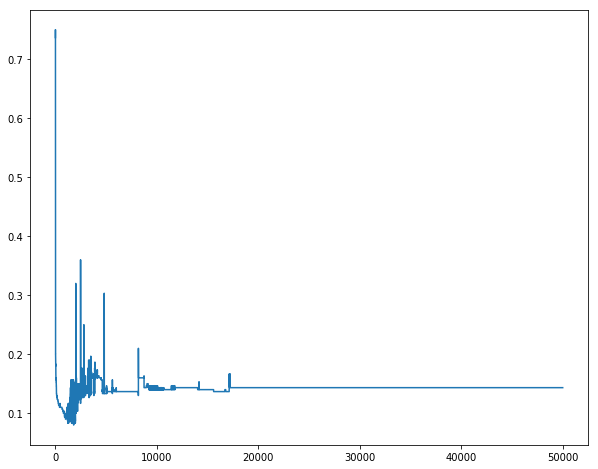

In [663]:
plt.figure(figsize=(10,8))
plt.plot(values[0],values[1])
plt.show()

In [664]:
def pred(inputs, wts):
    bias=np.zeros(inputs.shape[0]).reshape(inputs.shape[0],1)
    inputs=np.concatenate((inputs, bias), axis=1)
    
    hidden_1_input = np.matmul(inputs, wts[0])
    hidden_1_output = relu(hidden_1_input)
    bias=np.ones(hidden_1_output.shape[0]).reshape(hidden_1_output.shape[0],1)
    hidden_1_output=np.concatenate((hidden_1_output, bias), axis=1)

    hidden_2_input=np.matmul(hidden_1_output,wts[1])
    hidden_2_output=sigmoid(hidden_2_input)
    bias=np.ones(hidden_2_output.shape[0]).reshape(hidden_2_output.shape[0],1)
    hidden_2_output=np.concatenate((hidden_2_output, bias), axis=1)

    outlayer_input = np.matmul(hidden_2_output, wts[2] )
    outlayer_output = softmax(outlayer_input)
    
    return np.argmax(outlayer_output,axis=1)

In [665]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, train_data, color):
    # Set min and max values and give it some padding
    x_min, x_max = train_data[:, 0].min() - .5, train_data[:, 0].max() + .5
    y_min, y_max = train_data[:, 1].min() - .5, train_data[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()],wts)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=color, cmap=plt.cm.RdYlGn)

Text(0.5,1,'Logistic Regression')

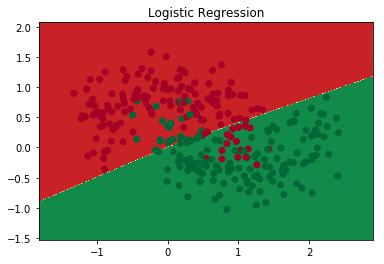

In [666]:
# plot boundary
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (1,1)

In [667]:
results=learning(X,y,50000,1,1)

epoch =1500, error=0.15333333333333332, acc=0.8466666666666667
epoch =3000, error=0.15333333333333332, acc=0.8466666666666667
epoch =4500, error=0.15333333333333332, acc=0.8466666666666667
epoch =6000, error=0.15, acc=0.85
epoch =7500, error=0.15333333333333332, acc=0.8466666666666667
epoch =9000, error=0.16, acc=0.84
epoch =10500, error=0.15, acc=0.85
epoch =12000, error=0.16, acc=0.84
epoch =13500, error=0.15666666666666668, acc=0.8433333333333334
epoch =15000, error=0.15666666666666668, acc=0.8433333333333334
epoch =16500, error=0.15333333333333332, acc=0.8466666666666667
epoch =18000, error=0.15333333333333332, acc=0.8466666666666667
epoch =19500, error=0.15333333333333332, acc=0.8466666666666667
epoch =21000, error=0.15666666666666668, acc=0.8433333333333334
epoch =22500, error=0.15666666666666668, acc=0.8433333333333334
epoch =24000, error=0.15666666666666668, acc=0.8433333333333334
epoch =25500, error=0.15666666666666668, acc=0.8433333333333334
epoch =27000, error=0.156666666666

In [668]:
wts=results[0]

Text(0.5,1,'Logistic Regression')

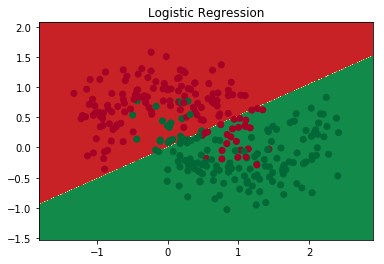

In [669]:
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (2,2)

In [670]:
results=learning(X,y,50000,2,2)

epoch =1500, error=0.13, acc=0.87
epoch =3000, error=0.12666666666666668, acc=0.8733333333333333
epoch =4500, error=0.12666666666666668, acc=0.8733333333333333
epoch =6000, error=0.13, acc=0.87
epoch =7500, error=0.13, acc=0.87
epoch =9000, error=0.13, acc=0.87
epoch =10500, error=0.13, acc=0.87
epoch =12000, error=0.12666666666666668, acc=0.8733333333333333
epoch =13500, error=0.12666666666666668, acc=0.8733333333333333
epoch =15000, error=0.12666666666666668, acc=0.8733333333333333
epoch =16500, error=0.12666666666666668, acc=0.8733333333333333
epoch =18000, error=0.12666666666666668, acc=0.8733333333333333
epoch =19500, error=0.12666666666666668, acc=0.8733333333333333
epoch =21000, error=0.13, acc=0.87
epoch =22500, error=0.13, acc=0.87
epoch =24000, error=0.13, acc=0.87
epoch =25500, error=0.12666666666666668, acc=0.8733333333333333
epoch =27000, error=0.13, acc=0.87
epoch =28500, error=0.13, acc=0.87
epoch =30000, error=0.13, acc=0.87
epoch =31500, error=0.13, acc=0.87
epoch =330

In [671]:
wts=results[0]

Text(0.5,1,'Logistic Regression')

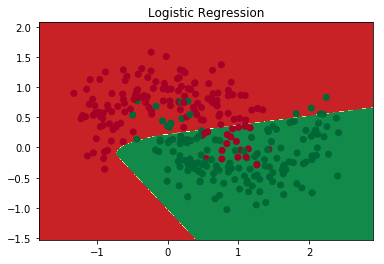

In [672]:
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (3,3)

In [673]:
results=learning(X,y,50000,3,3)

epoch =1500, error=0.12333333333333334, acc=0.8766666666666667
epoch =3000, error=0.12666666666666668, acc=0.8733333333333333
epoch =4500, error=0.12666666666666668, acc=0.8733333333333333
epoch =6000, error=0.12666666666666668, acc=0.8733333333333333
epoch =7500, error=0.13, acc=0.87
epoch =9000, error=0.13, acc=0.87
epoch =10500, error=0.12333333333333334, acc=0.8766666666666667
epoch =12000, error=0.12666666666666668, acc=0.8733333333333333
epoch =13500, error=0.12666666666666668, acc=0.8733333333333333
epoch =15000, error=0.12, acc=0.88
epoch =16500, error=0.11333333333333333, acc=0.8866666666666667
epoch =18000, error=0.12666666666666668, acc=0.8733333333333333
epoch =19500, error=0.12, acc=0.88
epoch =21000, error=0.12666666666666668, acc=0.8733333333333333
epoch =22500, error=0.12333333333333334, acc=0.8766666666666667
epoch =24000, error=0.14333333333333334, acc=0.8566666666666667
epoch =25500, error=0.13, acc=0.87
epoch =27000, error=0.13333333333333333, acc=0.8666666666666667

In [674]:
wts=results[0]

Text(0.5,1,'Logistic Regression')

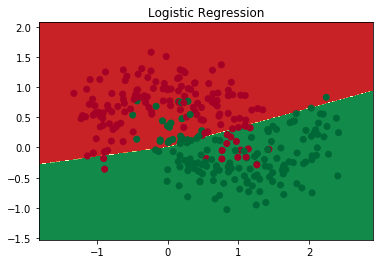

In [675]:
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (4,4)

In [676]:
results=learning(X,y,50000,4,4)

epoch =1500, error=0.11666666666666667, acc=0.8833333333333333
epoch =3000, error=0.11666666666666667, acc=0.8833333333333333
epoch =4500, error=0.10666666666666667, acc=0.8933333333333333
epoch =6000, error=0.12666666666666668, acc=0.8733333333333333
epoch =7500, error=0.12, acc=0.88
epoch =9000, error=0.12333333333333334, acc=0.8766666666666667
epoch =10500, error=0.12666666666666668, acc=0.8733333333333333
epoch =12000, error=0.12, acc=0.88
epoch =13500, error=0.12333333333333334, acc=0.8766666666666667
epoch =15000, error=0.10333333333333333, acc=0.8966666666666666
epoch =16500, error=0.1, acc=0.9
epoch =18000, error=0.09666666666666666, acc=0.9033333333333333
epoch =19500, error=0.09, acc=0.91
epoch =21000, error=0.08333333333333333, acc=0.9166666666666666
epoch =22500, error=0.09, acc=0.91
epoch =24000, error=0.08666666666666667, acc=0.9133333333333333
epoch =25500, error=0.08333333333333333, acc=0.9166666666666666
epoch =27000, error=0.08333333333333333, acc=0.9166666666666666
e

In [677]:
wts=results[0]

Text(0.5,1,'Logistic Regression')

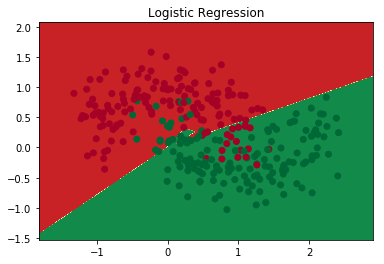

In [678]:
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (5,5)

epoch =1500, error=0.11, acc=0.89
epoch =3000, error=0.09333333333333334, acc=0.9066666666666666
epoch =4500, error=0.09333333333333334, acc=0.9066666666666666
epoch =6000, error=0.10333333333333333, acc=0.8966666666666666
epoch =7500, error=0.12333333333333334, acc=0.8766666666666667
epoch =9000, error=0.12333333333333334, acc=0.8766666666666667
epoch =10500, error=0.16666666666666666, acc=0.8333333333333334
epoch =12000, error=0.14333333333333334, acc=0.8566666666666667
epoch =13500, error=0.14333333333333334, acc=0.8566666666666667
epoch =15000, error=0.14666666666666667, acc=0.8533333333333334
epoch =16500, error=0.14333333333333334, acc=0.8566666666666667
epoch =18000, error=0.14333333333333334, acc=0.8566666666666667
epoch =19500, error=0.14333333333333334, acc=0.8566666666666667
epoch =21000, error=0.14333333333333334, acc=0.8566666666666667
epoch =22500, error=0.14333333333333334, acc=0.8566666666666667
epoch =24000, error=0.16333333333333333, acc=0.8366666666666667
epoch =2550

Text(0.5,1,'Logistic Regression')

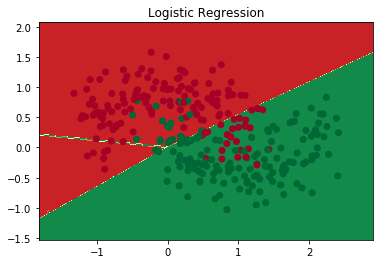

In [679]:
results=learning(X,y,50000,5,5)
wts=results[0]
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (20,20)

epoch =1500, error=0.11, acc=0.89
epoch =3000, error=0.14, acc=0.86
epoch =4500, error=0.13333333333333333, acc=0.8666666666666667
epoch =6000, error=0.13666666666666666, acc=0.8633333333333333
epoch =7500, error=0.13333333333333333, acc=0.8666666666666667
epoch =9000, error=0.13333333333333333, acc=0.8666666666666667
epoch =10500, error=0.13666666666666666, acc=0.8633333333333333
epoch =12000, error=0.13666666666666666, acc=0.8633333333333333
epoch =13500, error=0.14333333333333334, acc=0.8566666666666667
epoch =15000, error=0.13, acc=0.87
epoch =16500, error=0.13, acc=0.87
epoch =18000, error=0.13, acc=0.87
epoch =19500, error=0.12666666666666668, acc=0.8733333333333333
epoch =21000, error=0.13, acc=0.87
epoch =22500, error=0.14, acc=0.86
epoch =24000, error=0.14, acc=0.86
epoch =25500, error=0.14, acc=0.86
epoch =27000, error=0.14, acc=0.86
epoch =28500, error=0.14, acc=0.86
epoch =30000, error=0.14, acc=0.86
epoch =31500, error=0.14, acc=0.86
epoch =33000, error=0.13333333333333333

Text(0.5,1,'Logistic Regression')

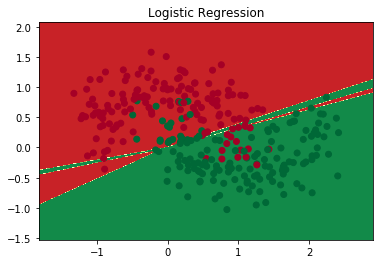

In [680]:
results=learning(X,y,50000,20,20)
wts=results[0]
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")

## (50,50)

epoch =1500, error=0.13666666666666666, acc=0.8633333333333333
epoch =3000, error=0.13666666666666666, acc=0.8633333333333333
epoch =4500, error=0.12333333333333334, acc=0.8766666666666667
epoch =6000, error=0.12666666666666668, acc=0.8733333333333333
epoch =7500, error=0.12666666666666668, acc=0.8733333333333333
epoch =9000, error=0.13, acc=0.87
epoch =10500, error=0.12666666666666668, acc=0.8733333333333333
epoch =12000, error=0.13, acc=0.87
epoch =13500, error=0.13333333333333333, acc=0.8666666666666667
epoch =15000, error=0.12666666666666668, acc=0.8733333333333333
epoch =16500, error=0.12666666666666668, acc=0.8733333333333333
epoch =18000, error=0.12666666666666668, acc=0.8733333333333333
epoch =19500, error=0.12666666666666668, acc=0.8733333333333333
epoch =21000, error=0.12666666666666668, acc=0.8733333333333333
epoch =22500, error=0.12666666666666668, acc=0.8733333333333333
epoch =24000, error=0.12666666666666668, acc=0.8733333333333333
epoch =25500, error=0.12666666666666668,

Text(0.5,1,'Logistic Regression')

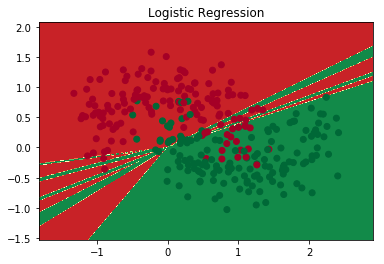

In [681]:
results=learning(X,y,50000,50,50)
wts=results[0]
plot_decision_boundary(pred_func = pred, train_data = X, color = y)
plt.title("Logistic Regression")